\title{Assignment 1 \\ Advanced Signal Processing}
\author{Thomas Seeberg Christiansen}
\date{\today}

\maketitle

In [2]:
##### Imports #####
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.signal as sig
import import_ipynb
import FunctionLibrary as FL

importing Jupyter notebook from FunctionLibrary.ipynb


# Problem 1

## 1)

The system function is defined as:
$$H(z)=1+2.5z^{-1}+z^{-2}$$
which we need to factorize into the two components of a minimum phase filter $H_{min}(z)$ and an all-pass filter $H_{ap}(z)$. The first step is determining the Zeros of $H(z)$. 
$$H(z)=(z^{-1}+2)(z^{-1}+0.5)$$
$$z_1=-1/2 \quad\textrm{and}\quad z_2=-2$$
Here we have $z_1$ being inside the unit circle and $z_2$ being outside and $z_2$ would need to be reflected back inside the unit circle with its reciprocal $1/z_2=-0.5$. The decomposition can be constructed with
$$H(z)=\underbrace{H_1(z)(1-az^{-1})\vphantom{\frac{(z^{-1}-a^\ast)}{(1-az^{-1})}}}_\text{minimum phase} \underbrace{\frac{(z^{-1}-a^\ast)}{(1-az^{-1})}}_\text{All-pass}$$
A minimum phase system is defined as having its poles and zeros inside the unit circle and since $z_1$ being inside, we have the factor
$$H_min(z)=H_1(z)(1+2z^{-1})=(1+0.5z^{-1})(1+2z^{-1})=\frac{1}{2}z^{-2}+2z^{-1}+2$$
as the minimum phase.
The all-pass can be constructed, using the given form, as 
$$H_{ap}(z)=\frac{(z^{-1}-a^\ast)}{(1-az^{-1})}=\frac{z^{-1}-(-2)}{1-(-0.5)z^{-1}}=\frac{z^{-1}+2}{1+0.5z^{-1}}$$
Combining everything, we get the decomposition as:
$$H(z)=H_{min}(z)H_{ap}(z)=\bigg(\frac{1}{2}z^{-2}+2z^{-1}+2\bigg)\bigg(\frac{z^{-1}+2}{1+0.5z^{-1}}\bigg)$$

## 2)

Filtering with the system function $H(z)$ filter yields a constant group delay due to the filter being a linear phase filter. This means all frequency components of the signal are eqaully delayed without introducing phase distortion. However, filtetering with a minimum phase filter $H_{min}(z)$ does not have a constant group delay because it tries to minimize the group delay at the frequency components, meaning different frequencies experience different delays in turn create phase distortion. In summary, filtetering $H_{min}(z)$ has the least phase delay, but possible distortion, while filtering with $H(z)$ has uniform delay without distortion. Choosing which to use is application dependent if one would want to preserve the phase or minimize the delay. 

# Problem 2

## 1) Compute the autocorrelation

Inserting $y[n]$ into $r_y[l]$
$$\begin{aligned}
r_y[l]&=E\Bigg(\bigg(x[n]-\frac{1}{5}[n-1]\bigg)\cdot\bigg(x[n-l]-\frac{1}{5}x[n-l-1]\bigg)\Bigg) \\
&=E\bigg(x[n]x[n-l]-\frac{1}{5}x[n]x[n-l-1]-\frac{1}{5}x[n-1]x[n-l]+\frac{1}{25}x[n-1]x[n-l-1]\bigg)
\end{aligned}$$
The expected operator is linear meaning the expected value of a sum of variables is equivalent to the sum of the expected value of the individual variables, also scaling linearly with constants. So,
$$r_y[l]=E\big(x[n]x[n-l]\big)-\frac{1}{5}E\big(x[n]x[n-l-1]\big)-\frac{1}{5}E\big(x[n-1]x[n-l]\big)+\frac{1}{25}E\big(x[n-1]x[n-l-1]\big)$$

Looking at $l=0$, we get:
$$r_y[0]=E\big(x[n]^2\big)-\frac{1}{5}E\big(x[n]x[n-1]\big)-\frac{1}{5}E\big(x[n-1]x[n]\big)+\frac{1}{25}E\big(x[n-1]^2\big)$$
and since $x[n]$ is zero-mean, unit-variance white noise, we have:
$$E(x[n]^2)=1\quad \textrm{and}\quad E(x[n]x[n-1])=0.$$
Thus,
$$r_y[0]=1-1/5\cdot0-1/5\cdot0+1/25\cdot1=1+1/25=26/25$$
Using the same procedure for $l=\pm1$ and $l=\pm2$, yields
$$r_y[\pm1]=0-1/5\cdot0-1/5\cdot1+0=-1/5$$
$$r_y[\pm2]=0$$
Finaly, the autocorrelation function can be described with the delta function:
$$r_y[l]=-\frac{1}{5}\delta[l+1]+\frac{26}{25}\delta[l]-\frac{1}{5}\delta[l-1]$$


## 2) Correlation discussion

To determine whether the two samples are correlated or not, we look at the autocorrelation evaluated at $l=2$. Which as we saw from above is equal to 0.
$$r_y[2]=-\frac{1}{5}\delta[3]+\frac{26}{25}\delta[2]-\frac{1}{5}\delta[1]=0$$
Hence, they are uncorrelated. The autocorrelation would need to be nonzero for them to be correlated. 

## 3) Mean value determination

The mean value of $y[n]$ is equivalent to the expected value.
$$\mu_y=E(y[n])=E\bigg(x[n]-\frac{1}{5}x[n-1]\bigg)$$
Having the same terms as the calculations in 1) and knowning $x[n]$ is a Gaussian random process with zero-mean, the expected values terms are:
$$\mu_y = 0-\frac{1}{5}\cdot0=0$$

## 4) Compute and sketch the PSD

We get the power spectral density (PSD) by taking the Fourier transform of the autocorrelation sequence. 
$$S_y(e^{j\omega})=\sum_{k=-\infty}^\infty r_y[l]e^{j\omega k}$$
The autocorrelation, as seen earlier, is zero for all other lags than $l=-1,0,1$, hence we get:
$$
\begin{aligned}
S_y(e^{j\omega})&=\sum_{k=-1}^1 r_y[l]e^{j\omega k} \\
&=r_y[-1]e^{j\omega}+r_y[0]+r_y[1]e^{-j\omega} \\
&=-\frac{1}{5}e^{j\omega}+\frac{26}{25}-\frac{1}{5}e^{-j\omega} \\
&=\frac{26}{25}-\frac{1}{5}(e^{j\omega}+e^{-j\omega})
\end{aligned}
$$
Using Eulers relation, $(2\cos(x)=e^{jx}+e^{-jx})$, we get
$$\frac{1}{5}(e^{j\omega}+e^{-j\omega})= \frac{2}{5}\cos(\omega)$$
Therefore,
$$S_y(e^{j\omega})=\frac{26}{25}-\frac{2}{5}\cos(\omega)$$
Plotting gets us the following.


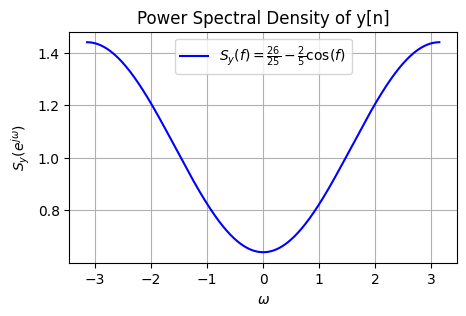

In [77]:
# Range
omega = np.linspace(-np.pi, np.pi, 500)
# Function
S_y = (26 / 25) - (2 / 5) * np.cos(omega)

# Plot the PSD
plt.figure(figsize=(5, 3))
plt.plot(omega, S_y, label=r'$S_y(f) = \frac{26}{25} - \frac{2}{5} \cos(f)$', color='blue')
plt.title('Power Spectral Density of y[n]')
plt.xlabel('$\omega$')
plt.ylabel('$S_y(e^{j\omega})$')
plt.grid(True)
plt.legend()
plt.show()

# Problem 3

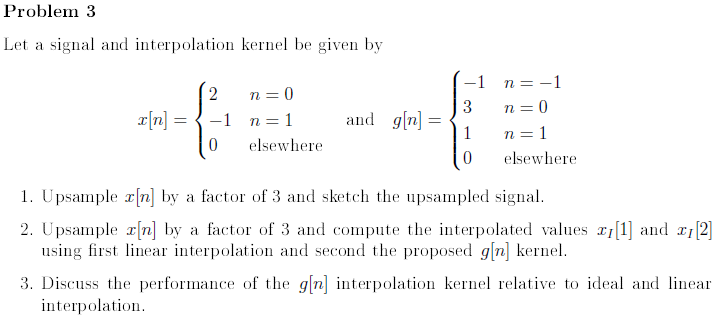

## 1) Upsample by 3

Upsampling by a factor of $I=3$ requires the insertion of $(I-1)=2$ samples between samples of $x[n]$. Therefore,
$$x_I[n]=\{2,0,0,-1,0,0,\dots\}.$$
Can be sketched as below:

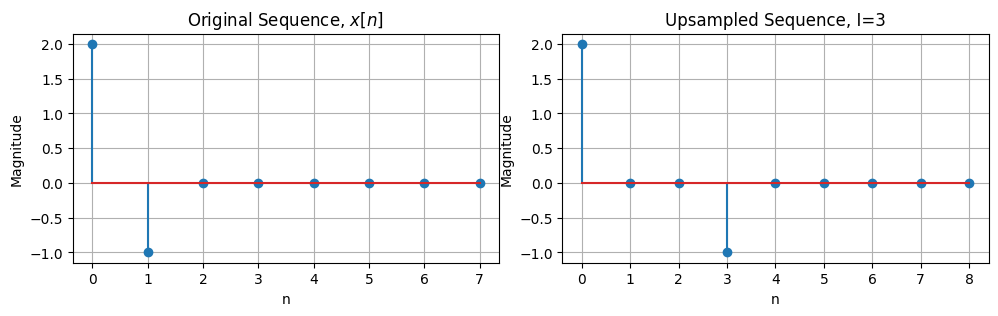

In [110]:
xn = [2, -1, *[0 for i in range(6)]]
I = 3
xn_upsample = FL.upsample(xn,I,3)
fig, ax = plt.subplots(1,2, figsize=(10,3))
fig.tight_layout(pad=1.5)
ax[0].stem(xn)
ax[0].set_xlabel("n")
ax[0].set_ylabel("Magnitude")
ax[0].grid()
ax[0].set_title("Original Sequence, $x[n]$")
ax[1].stem(xn_upsample)
ax[1].set_xlabel("n")
ax[1].set_ylabel("Magnitude")
ax[1].grid()
ax[1].set_title(f"Upsampled Sequence, I={I}")
plt.show()

## 2) Upsample by 3 and interpolate

Linear interpolation uses the triangular sequence:
$$g_{lin}[n]= 
\begin{cases}
    1-\frac{|n|}{I}, & -I<n<I \\
    0, & \textrm{otherwise}
\end{cases}
$$
Given $I=3$, we get the following filter:
$$g_{lin}[n]=
\begin{cases}
    \frac{1}{3}, & \textrm{for } n=-2 \\
    \frac{2}{3}, & \textrm{for } n=-1 \\
    1, & \textrm{for } n=0 \\
    \frac{2}{3}, & \textrm{for } n=1 \\
    \frac{1}{3}, & \textrm{for } n=2 \\
\end{cases}
$$
Then it is just a matter of a convolution between the sequence and the interpolation window. 
$$y[n]=x[n]\ast g_{lin}[n]$$
Therefore,
$$
\begin{aligned}
    y[0]&=1\cdot x[0]+\frac{2}{3}\cdot x[1]+\frac{1}{3}\cdot x[2] = 2 \\
    y[1]&=\frac{2}{3}\cdot x[0]+1\cdot x[1]+\frac{2}{3}\cdot x[2]+\frac{1}{3}\cdot x[3]=1 \\
    y[2]&=\frac{1}{3}\cdot x[0]+\frac{2}{3}\cdot x[1]+1\cdot x[2]+\frac{2}{3}\cdot x[3]+\frac{1}{3}\cdot x[4] = 0 \\
    \dots
\end{aligned}
$$
Using the given filter $g[n]$, we get:
$$
\begin{aligned}
    y[0]&=3\cdot x[0]-1\cdot x[1]= 6 \\
    y[1]&=1\cdot x[0]+3\cdot x[1]-1\cdot x[2]=2 \\
    y[2]&=1\cdot x[1]+3\cdot x[2]-1\cdot x[3]=1 \\
    \dots
\end{aligned}
$$
When plotted, we get the following:

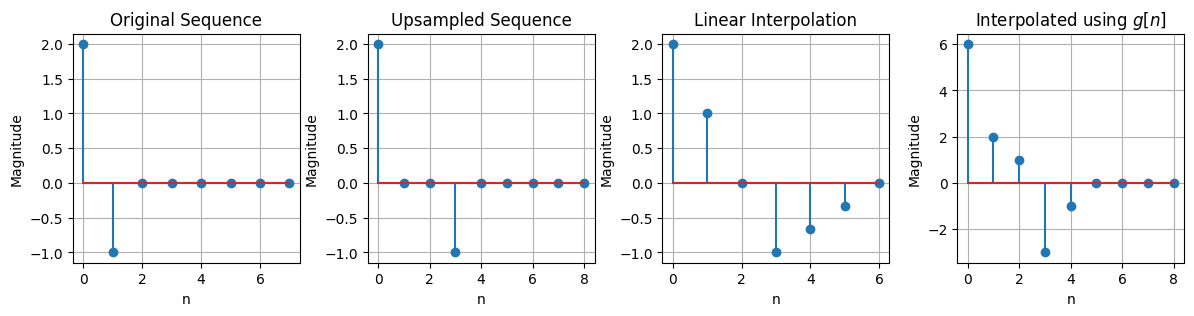

In [109]:
xn = [2, -1, *[0 for i in range(6)]]
gn = [-1, 3, 1]
I = 3
xn_upsample = FL.upsample(xn,I,3)
xn_lin_interp = FL.linInterp(xn_upsample, I)
xn_interp = np.convolve(xn_upsample, gn,'same')
fig, ax = plt.subplots(1,4, figsize=(12,3))
fig.tight_layout(pad=1.5)
ax[0].stem(xn)
ax[0].set_xlabel("n")
ax[0].set_ylabel("Magnitude")
ax[0].grid()
ax[0].set_title("Original Sequence")
ax[1].stem(xn_upsample)
ax[1].set_xlabel("n")
ax[1].set_ylabel("Magnitude")
ax[1].grid()
ax[1].set_title("Upsampled Sequence")
ax[2].stem(xn_lin_interp)
ax[2].set_xlabel("n")
ax[2].set_ylabel("Magnitude")
ax[2].grid()
ax[2].set_title("Linear Interpolation")
ax[3].stem(xn_interp)
ax[3].set_xlabel("n")
ax[3].set_ylabel("Magnitude")
ax[3].grid()
ax[3].set_title("Interpolated using $g[n]$")
plt.show()

## 3) Discuss the performance

# Problem 4

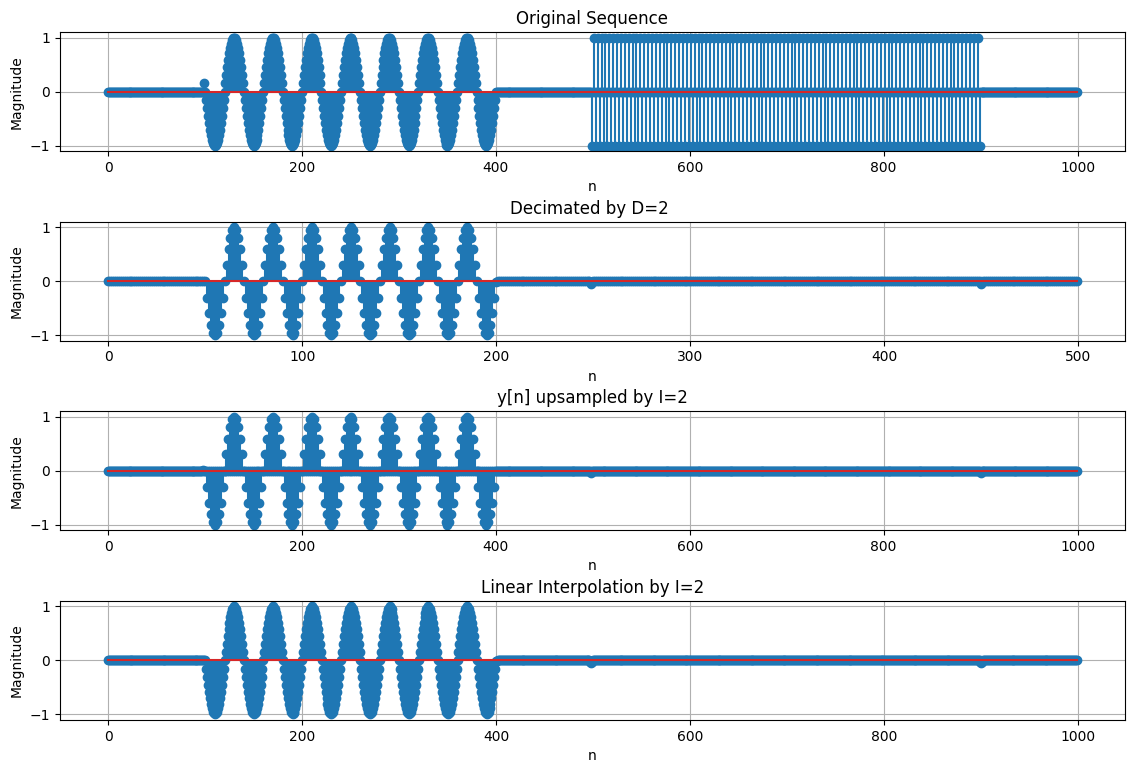

In [144]:
# Load data
xn = np.loadtxt("Data\SampleRateData.dat")
D = 2
I = 2

# Decimation
yn = scipy.signal.decimate(xn, D, 2,ftype='fir')

# Interpolation
yn_upsample = FL.upsample(yn,I,len(yn))
zn = FL.linInterp(yn_upsample,I)

fig, ax = plt.subplots(4,1, figsize=(12,8))
fig.tight_layout(pad=3)
ax[0].stem(xn)
ax[0].grid()
ax[0].set_xlabel("n")
ax[0].set_ylabel("Magnitude")
# ax[0].set_xlim(100,200)
# ax[0].set_xlim(450,550)
ax[0].set_title("Original Sequence")
ax[1].stem(yn)
ax[1].grid()
ax[1].set_xlabel("n")
ax[1].set_ylabel("Magnitude")
# ax[1].set_xlim(50,100)
# ax[1].set_xlim(200,500)
ax[1].set_title(f"Decimated by D={D} ")
ax[2].stem(yn_upsample)
ax[2].grid()
ax[2].set_xlabel("n")
ax[2].set_ylabel("Magnitude")
# ax[2].set_xlim(100,200)
ax[2].set_title(f"y[n] upsampled by I={I}")
ax[3].stem(zn)
ax[3].grid()
ax[3].set_xlabel("n")
ax[3].set_ylabel("Magnitude")
# ax[3].set_xlim(100,200)
ax[3].set_title(f"Linear Interpolation by I={I}")
plt.show()


The original $x[n]$ consists of two waveform parts. The first being a sine/cosine wave and the last somekind of repeating signal with $\{-1,0,1,0\}$. Then we decimate $x[n]$ by a factor of 2, which includes using a lowpass filter before downsampling and removing every $D=2$ samples and halving the spectrum. Next, we first upsample the signal by $I=2$, introducing a zero for every second sample, and lastly we linearly interpolate the upsampled signal. 
 
We have 'undone' the decimation with interpolation, but we have lost the last part of our original $x[n]$ sequence because it matched with every other sample being remove. I have tried showing it in the plot below where the vertical dashed lines correspond to every other sample:

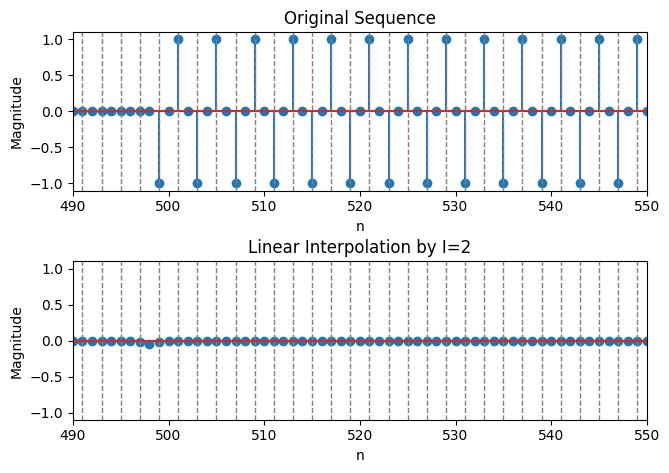

In [137]:
# Define a function to add vertical lines every other sample
def add_vertical_lines(axis, data, every=2):
    for i in range(1, len(data), every):
        axis.axvline(i, color='gray', linestyle='--', linewidth=1)

fig, ax = plt.subplots(2,1, figsize=(7,5))
fig.tight_layout(pad=3)

ax[0].stem(xn)
ax[0].set_xlabel("n")
ax[0].set_ylabel("Magnitude")
ax[0].set_xlim(490,550)
add_vertical_lines(ax[0], xn)
ax[0].set_title("Original Sequence")

ax[1].stem(zn)
ax[1].set_xlabel("n")
ax[1].set_ylabel("Magnitude")
ax[1].set_xlim(490,550)
add_vertical_lines(ax[1], zn) 
ax[1].set_title(f"Linear Interpolation by I={I}")
plt.show()

# Problem 5

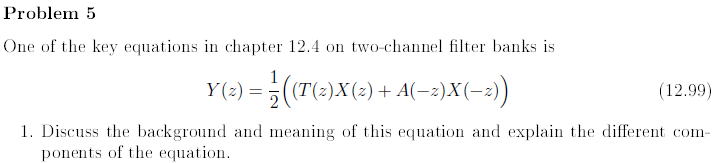

# Problem 6

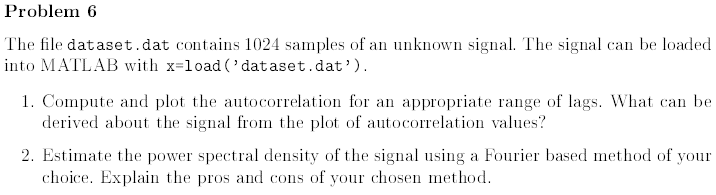

## 1) Autocorrelation

The autocorrelation is plotted below using $l=256$ lags. 

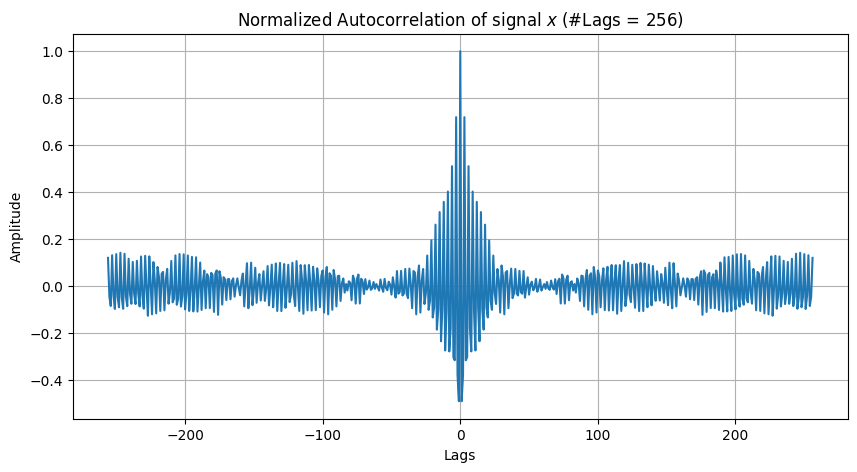

In [204]:
x = np.loadtxt("Data\dataset.dat")

# Compute autocorrelation with both negative and positive lags
def compute_autocorrelation_symmetrical(x):
    result = np.correlate(x, x, mode='full')
    lags = np.arange(-len(x) + 1, len(x))  # Lags from -(N-1) to +(N-1)
    return lags, result / np.max(result)  # Normalize

lags, autocorr = compute_autocorrelation_symmetrical(x)

num_lag = 256
lag_min, lag_max = -num_lag, num_lag
mask = (lags >= lag_min) & (lags <= lag_max)

# Plot the autocorrelation
plt.figure(figsize=(10, 5))
plt.plot(lags[mask], autocorr[mask])
plt.title(f"Normalized Autocorrelation of signal $x$ (#Lags = {num_lag})")
plt.xlabel("Lags")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

## 2) PSD

Why Welch?

0.328125
0.328125


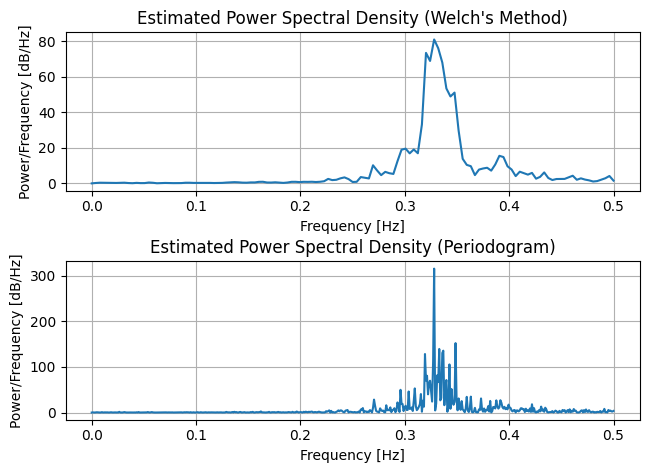

In [214]:
# Compute PSD using Welch's method
frequencies_welch, psd_welch = scipy.signal.welch(x)

# Compute the periodogram
frequencies_periodogram, psd_periodogram = scipy.signal.periodogram(x)

# max_psd_index_welch = np.argmax(psd_welch)
# max_psd_freq_welch = frequencies_welch[max_psd_index_welch]
# print(max_psd_freq_welch)

# max_psd_index_periodogram = np.argmax(psd_periodogram)
# max_psd_freq_periodogram = frequencies_periodogram[max_psd_index_periodogram]
# print(max_psd_freq_periodogram)

# Plot the PSD
fig, ax = plt.subplots(2,1, figsize=(7,5))
fig.tight_layout(pad=3)
ax[0].plot(frequencies_welch, psd_welch)
ax[0].set_xlabel("Frequency [Hz]")
ax[0].set_ylabel("Power/Frequency [dB/Hz]")
ax[0].set_title("Estimated Power Spectral Density (Welch's Method)")
ax[0].grid()
ax[1].plot(frequencies_periodogram, psd_periodogram)
ax[1].set_xlabel("Frequency [Hz]")
ax[1].set_ylabel("Power/Frequency [dB/Hz]")
ax[1].set_title("Estimated Power Spectral Density (Periodogram)")
ax[1].grid()
plt.show()
